# Predicting future short-term price movement and resultant prices using past inter-day data for S&P500 publically traded companies through time-series regression

#### _NTU DSAI SC1015 Mini Project By FCS3 Group 4 - Mahesh Nithilan U2320925C, Sunilkumar Hrishikesh, Rajkumar Saanvi_

We wanted to be able to predict stock prices for the near future using Machine Learning and Data Science. Doing this would allow us to make substantial financial profit if implemented correctly and accurately for obvious reasons. We chose not to do the same with cryptocurrencies because of their high volatility and tendency to sway to the market instead of potentially predicatable patterns.

#### **1. Sample Collection**
During initialization, 5 companies are randomly selected from the S&P500 CSV we sourced from an Actively Updated Repository on GitHub: https://github.com/datasets/s-and-p-500-companies/blob/main/data/constituents.csv

In [1]:
import warnings# Suppress FutureWarning messages
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd #Data Handling
from pandas import DataFrame as df #Data Handling
import yfinance as yf #Stock Information
from datetime import datetime
import requests #Netoworked Requests
import matplotlib.pyplot as plt #Graph Plotting

In [2]:
def chooserandomstockCSV(stockcsv):
    df = pd.read_csv(stockcsv, encoding='cp1252')
    selected = df.sample(n=5)
    return selected
def chooserandomstockJSON(stockjson):
    df = pd.read_json(stockjson)
    selected = df.sample(n=5)
    return selected
selectedstock = chooserandomstockCSV("AllSP500Stocks.csv")
selectedstock.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
393,RL,Ralph Lauren Corporation,Consumer Discretionary,"Apparel, Accessories & Luxury Goods","New York City, New York",2/2/2007,1037038,1967
142,DAY,Dayforce,Industrials,Human Resource & Employment Services,"Minneapolis, Minnesota",9/20/2021,1725057,1992
242,HUM,Humana,Health Care,Managed Health Care,"Louisville, Kentucky",12/10/2012,49071,1961
226,HAS,Hasbro,Consumer Discretionary,Leisure Products,"Pawtucket, Rhode Island",9/30/1984,46080,1923
204,FTV,Fortive,Industrials,Industrial Machinery & Supplies & Components,"Everett, Washington",7/1/2016,1659166,2016


All their available historic inter-day stock information is downloaded from the yfinance python module, which parses yahoo finance for this information. yfinance was chosen because it was integrated as a python module and therefore had unlimited requests unlike APIs such as Alpha Vantage. 

In [3]:
#Create yf Ticker objects for all stock and download historical data and display it
StockTickers = list(selectedstock['Symbol']) 
DaytoDayData = yf.download(tickers = StockTickers, interval = "1d")

[**********************60%%***                   ]  3 of 5 completed

[*********************100%%**********************]  5 of 5 completed


We cannot access historical all-day intra-day pricing information. Instead, we can access the daily stock price highs, lows, closing and opening prices as well as the divident and split adjusted stock closing prices. Some stocks also showed as invalid, probably due to their tickers not being available through yfinance. Instead, we chose to sample from the S&P500, which was always available. 
We specifically chose to model only closing information, as the time it appeared did not change unlike the lows and highs. This also simplifies our data graphs significantly and removes potentially disruptive noise.

In [4]:
DaytoDayData = DaytoDayData["Close"]
DaytoDayData.head()

Ticker,DAY,FTV,HAS,HUM,RL
Date,,,,,
1980-03-17,NaN,NaN,0.105350,NaN,NaN
1980-03-18,NaN,NaN,0.098765,NaN,NaN
1980-03-19,NaN,NaN,0.109739,NaN,NaN
1980-03-20,NaN,NaN,0.107545,NaN,NaN
1980-03-21,NaN,NaN,0.105350,NaN,NaN


We then graphed the trend in data for 5 of them to see if there were any predictable patterns.

RL


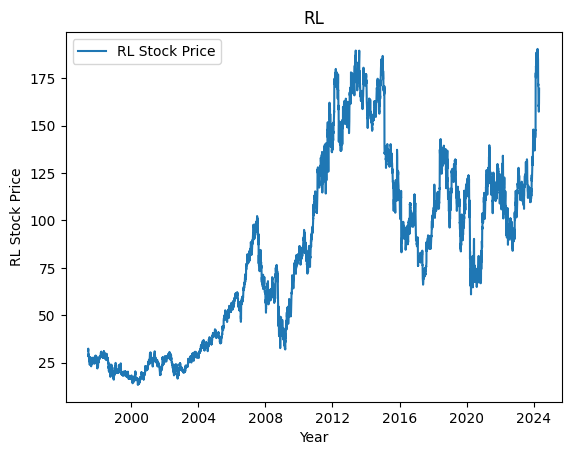

HUM


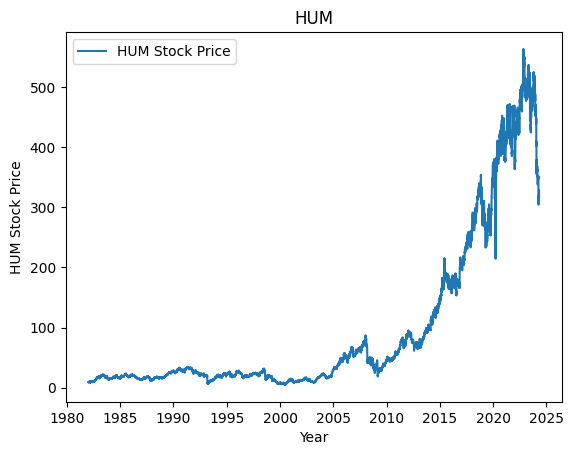

DAY


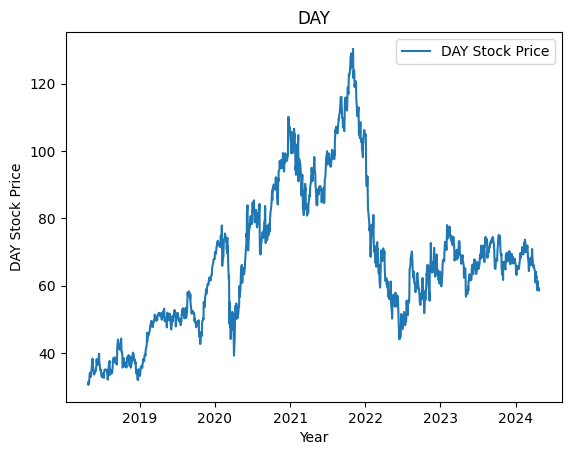

FTV


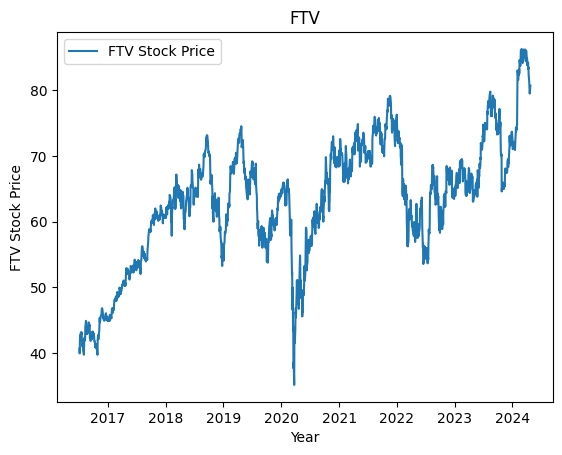

HAS


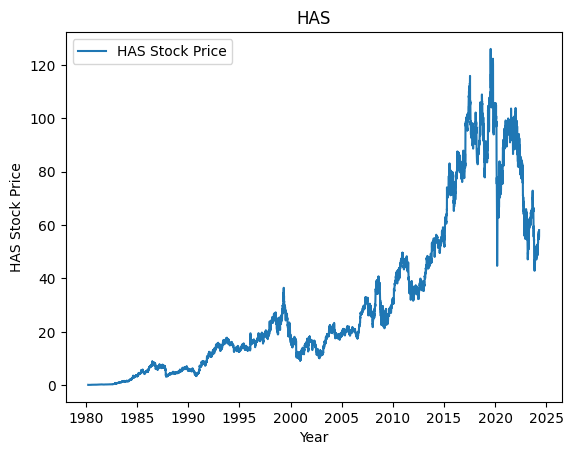

In [5]:
def plot_line_stocks(values, ticker):
    plt.plot(values[ticker].dropna(), label = str(ticker+' Stock Price')) #Drop all Null Values and Graph the Stock Data
    plt.title(ticker)
    plt.xlabel('Year')
    plt.ylabel(str(ticker+' Stock Price'))
    plt.legend()
    plt.show()
def plot_box_stocks(values, ticker):
    plt.boxplot(values[ticker].dropna()) #Drop all Null Values and Graph the Stock Data
    plt.title(ticker)
    plt.xlabel(ticker)
    plt.ylabel(str(ticker+' Stock Price'))
    plt.legend()
    plt.show()
graphing_selected = selectedstock["Symbol"].sample(n=5)
for ticker in graphing_selected:
    print(ticker)
    plot_line_stocks(DaytoDayData, ticker)


#### **2. Problem Formulation**
Predicting future short-term price movement and resultant prices using past inter-day data for SP500 publically traded companies through time-series regression


#### **3. Data Preparation**
Given that we had prepared data collection and sampling from the prior stages, this stage was mostly adapting the data so it could be used for further statistical analysis.
The data itself was very structured. We already only wanted closing data and so we seperated this from the other available data to decrease noise.
We just had to remove NA values during processing because we mass downloaded our stocks and they were automatically fit to the earliest data available, which usually belonged to the oldest company in the sample.

#### **4. Statistical Description**
The description of the data provided some understanding of the variance and distribution of each stock, as well as the number of available data points. 

This latter statistic was useful in determining the range of training and testing data later on. The standard deviation also allowed us to guage the relative volatility of the stock as a whole.

For this, we plot a box plot for each of the sampled stocks to see if theres a meaninful pattern.

In [6]:
DaytoDayData = DaytoDayData.dropna(axis=1, how='all')#removing erroneous values from the data set(all null)
DaytoDayData.describe()

Ticker,DAY,FTV,HAS,HUM,RL
count,1509.000000,1964.000000,11119.000000,10667.000000,6761.000000
mean,67.470610,63.108537,31.436746,97.427353,82.836493
std,21.165337,9.555529,30.460614,135.744262,48.584709
min,30.520000,35.154812,0.079012,4.750000,13.250000
25%,51.560001,58.113011,8.009260,17.755209,31.930000
50%,66.220001,64.225941,19.000000,27.250000,81.779999
75%,77.739998,69.472502,46.405001,94.219997,119.080002
max,130.320007,86.290001,126.070000,563.000000,190.419998


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


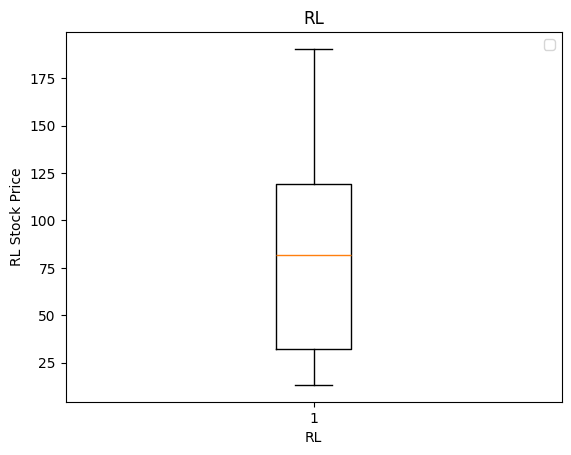

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


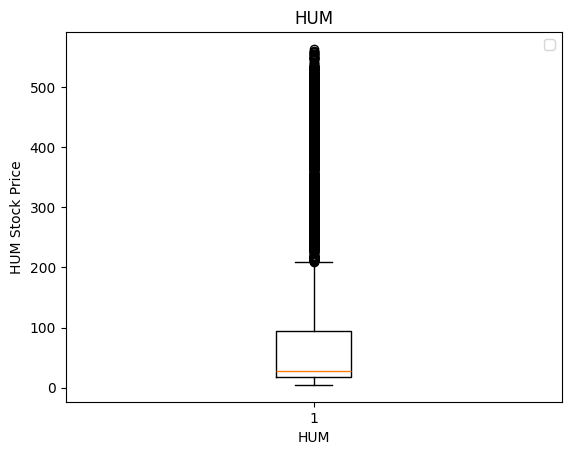

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


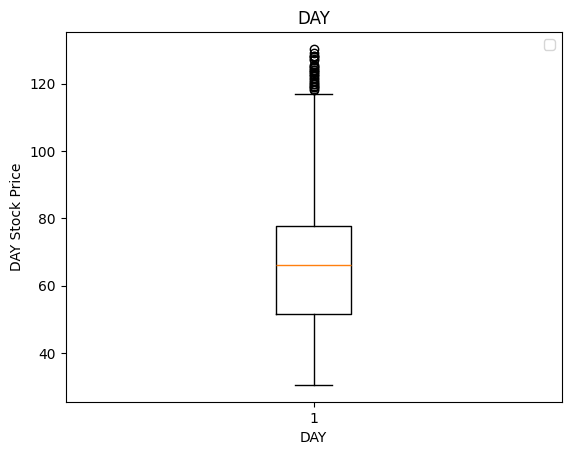

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


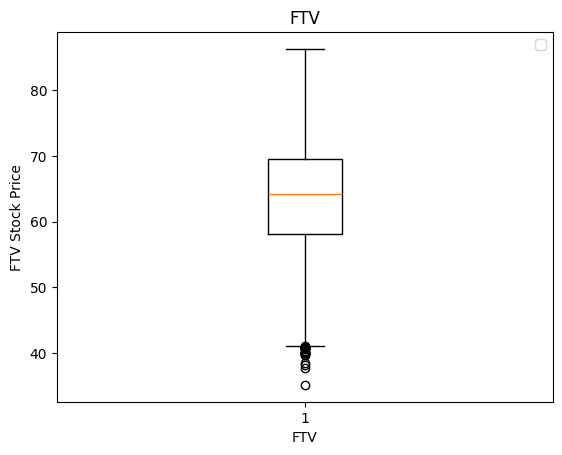

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


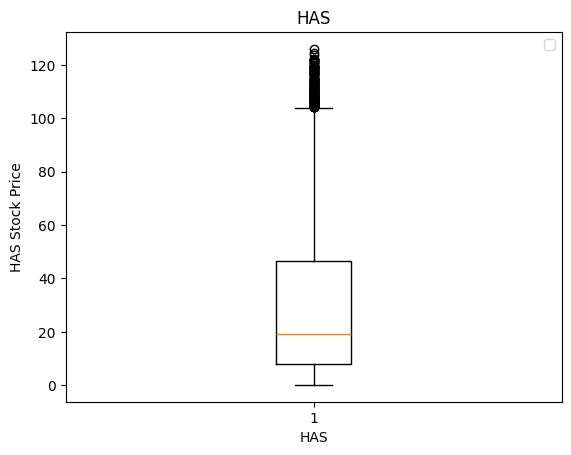

In [7]:
for ticker in graphing_selected:
    plot_box_stocks(DaytoDayData, ticker)

#### **5. Volatility and Exploratory Analysis**
We computed the number of up-days and down-days for each stock. This is different from the overall price growth because we are only interested in day-day price changes and so knowing the ratio of ups-downs is highly useful in computing the volatility vs explained variance relation of any model we make. Through this, we discover that most stocks have a day-day uprate of around 50% for the S&P 500, and their overall growth over time is due to the magnitudes of the ups being higher than the lows


DAY has an UpRate of 7.311151079136691%
FTV has an UpRate of 9.172661870503598%
HAS has an UpRate of 54.41546762589928%
HUM has an UpRate of 51.16007194244604%


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


RL has an UpRate of 30.611510791366907%


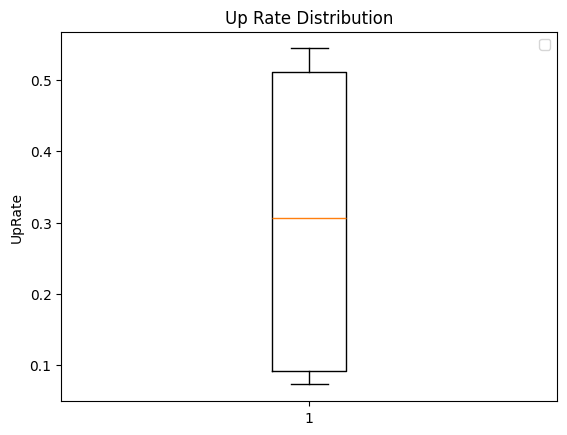

In [8]:
def upsanddowns(data, ticker):
    up = 0
    down = 0
    for day in range(len(data[ticker])):
        if data[ticker][day] >= data[ticker][day-1]:
            up+=1
        else:
            down +=1
    return (up)/(up+down)
up_rate_list = []
for ticker in DaytoDayData.dropna():
    tickerupsanddowns = upsanddowns(DaytoDayData, ticker)
    up_rate_list.append(tickerupsanddowns)
    print(ticker + " has an UpRate of " + str(100*tickerupsanddowns)+ "%")
plt.boxplot(up_rate_list) #Drop all Null Values and Graph the Stock Data
plt.title("Up Rate Distribution")
plt.ylabel("UpRate")
plt.legend()
plt.show()

#### **6. Pattern Recognition and Analytic Visualization**
Stock prices notoriously have no visible patterns. If they did, everyone would be rich. Because of the apparant randomness of the data, it was difficult to discover stock-specific trends just looking at the graphs visually or through simple regression models. We used the above formula to calculate the up-down ratio. 
What we also realized were these stocks were growing rather consistently, especially those in the S&P 500, with some small variations from year-year but overall increase in stock price. This made us realize that 
we were likely to be more successful in predicting stock prices if we chose less volatile stocks, and so this was a hypothesis we wished to test.

The best way of representing the information we chose is as a stock price chart as we've shown above. 


#### **7. Machine Learning and Algorithmic Optimization**
As we've already established, the movement of pricing data is naturally dynamic and highly sporadic day-to-day. With our goal being wanting to predict the next day, the most natural thing to do would be to take the previous days and try to see if theres some inner pattern
However, this inner pattern is very, very difficult to find through trial and error - if there even is one. Needing to compute this for every seperate stock we take is impossible and a waste of time. For this reason, and given the amount of data we had, we decided to use Neural Networks to approximate the stock price function for a specific stock.
The question then became what flavour of neural network to choose. Through research, we decided to use RNN implementations because they were perfect for time series data. The specific implementation we chose
of RNNs were LSTMs(Long-Short Term Memory). This is because they avoided the vanishing/exploding gradient problem and are more capable of determining long term patterns because of their ability to selectively remember
data deemed important or unimportant. This filters alot of noise, which is crucial in this sporadic application.

Implementation specifically, we starting by implementing a 3-LSTM Layer NN that takes one days price as input and is required to predict that price some n days later, lets call this the prediction buffer.
 
Through trial and error and research, we optimized the NN to use the adam optimizer and set the loss function to MSE, as the size and magnitude of the error is signficant in determining the new weights and biases.

Each LSTM Layer had 200 nodes, which we set because of the sheer magnitude of the data.

The other implementation details are in the notebook, and each iteration of the model takes only a couple of minutes to train. However, it must be added that this method of trial and error in optimizing the hyperparametrs is suboptimal.

We then ran the algorithm on randomized stock selections to iteratively improve the implementation for a more general train-and-use application. We selected an 75-25 training-test buffer for viewing the variation in its entirety.

We ran for 30 epochs with a 30 batch size to represent monthly data period updates

In [9]:
#Libraries to be used in building the model
import numpy as np
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
import matplotlib.pyplot as plt
trainingScaler = MinMaxScaler(feature_range=(0,1))#Set the scaler to be used later on to MinMax with a range of 0-1
predictionbuffer = 30  #default number of data points needed to predict a future point
predictiondatapoints = 6 #Number of days attempting to be predicted ahead-1

In [10]:
def close_values(df, ticker): #Remove NA values for each data series
    df_close = df[ticker].dropna()
    df_close_values = df_close.values
    return df_close_values

In [11]:
def reshape_closeprices(df, ticker):#Reshape the prices series so that that can be input into the Keras layers
    df_close_values = close_values(df, ticker)
    df_close_values = df_close_values.reshape(-1,1)
    return df_close_values

In [12]:
def reshapedprice_scaler(shapedvalues, ticker):#Transform the prices dynamically on a scale of 0 to 1 using the scaler defined previously
    shapedvalues_scaled = trainingScaler.fit_transform(shapedvalues)
    return shapedvalues_scaled

In [13]:
#Creating training dataset from input dataset
def create_training_dataset(scaledshapedvalues, ticker):
    #75:25 approx split train to test #modifications made: decreased the testing set to one month in modern time to test accuracy for next month, cannot random sample becasue it is in chronological order
    training_split = math.floor(len(scaledshapedvalues)*0.75)
    training = scaledshapedvalues[0:training_split]
    independent_tr = []
    dependent_tr = []
    for i in range(predictionbuffer, len(training)-predictiondatapoints):
      independent_tr.append(training[i-predictionbuffer:i][0])#appending predictionbuffer points to independent variable list
      dependent_tr.append(training[i+predictiondatapoints-1][0])#Appending singular value to predict predictiondatapoints ahead
    independent_tr, dependent_tr = np.array(independent_tr), np.array(dependent_tr) #converting to nparray for faster processing
    independent_tr = np.reshape(independent_tr, (independent_tr.shape[0], independent_tr.shape[1], 1)) #reshaping input to fit keras
    return independent_tr, dependent_tr

In [14]:
#Creating the LSTM Model Using Keras
def create_model(independent_tr, dependent_tr):
    model = Sequential()
    model.add(LSTM(200, return_sequences=True, input_shape=(independent_tr.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(200, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(200))
    model.add(Dropout(0.2))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(optimizer='adam',loss='mean_squared_error')
    model.fit(independent_tr, dependent_tr, epochs = 30, batch_size = 30, verbose=0)
    return model
    

In [15]:
#Testing Dataset Prep
def test_model(model, values):
    training_split = math.floor(len(values)*0.75)
    testing_input = values[training_split:]
    testing_input = trainingScaler.fit_transform(testing_input)
    testing = []
    for i in range(predictionbuffer, len(testing_input) + predictionbuffer):
        testing.append(testing_input[i-predictionbuffer:i][0])#appending relevant values to be tested
    testing = np.array(testing)
    testing = np.reshape(testing, (testing.shape[0], testing.shape[1], 1)) #reshaping to fit input
    predict = model.predict(testing)
    predict = trainingScaler.inverse_transform(predict) #predicted values are scaled, so inverse converts them to stock prices
    return predict

In [16]:
def plot(predict, values, ticker):
    training_split = math.floor(len(values)*0.75)
    plt.plot(values[training_split:], color = 'blue', label = str(ticker+' Stock Price'))
    plt.plot(predict, color = 'red', label = 'Predicted Stock Price')
    plt.title(ticker)
    plt.xlabel('Number of Days Since End of Training Set')
    plt.ylabel(str(ticker+' Stock Price'))
    plt.legend()
    plt.show()

In [17]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from math import sqrt
def updownmagnitudeerrors(predict, values, ticker):
    training_split = math.floor(len(values)*0.75) 
    errorgraph = []
    changegraphtest = []
    changegraphactual = []
    day_count = 0
    #Changed predictiondata points to 1
    for day in range(len(predict)):
      errorgraph.append((values[training_split+day]-predict[day])/values[training_split+day])
      if predict[day-1]<predict[day]:
        changegraphtest.append(1)
      elif predict[day-1]>=predict[day]:
        changegraphtest.append(-1)
      if values[training_split+day-1]<values[training_split+day]:
        changegraphactual.append(1)
      elif values[training_split+day-1]>=values[training_split+day]:
        changegraphactual.append(-1)
      if values[training_split + day] > values[training_split + day - 1] and predict[day] > predict[day-1]:
        day_count += 1
      elif values[training_split + day] < values[training_split + day - 1] and predict[day] < predict[day-1]:
        day_count += 1
      elif values[training_split + day] == values[training_split + day - 1] and predict[day] == predict[day-1]:
        day_count += 1
    print("Percentage of days with correct predicted direction of stock price " + str(predictiondatapoints+1) + " days ahead for "+ ticker + " is:")
    print(str(day_count/len(predict) * 100) + "%")
    conf_matrix = confusion_matrix(changegraphactual, changegraphtest)
    conf = ConfusionMatrixDisplay(conf_matrix)
    conf.plot()
    plt.show()
    errorgraph = []
    for day in range(len(predict)):
      errorgraph.append((values[training_split+day]-predict[day])/values[training_split+day])
    plt.plot(errorgraph, color = 'blue', label = str(ticker+' Overall Prediction Error'))
    plt.title(str(ticker))
    plt.ylabel(str(ticker+' Prediction Error'))
    plt.legend()
    plt.show()
def valueerrors(predict, values, ticker):
    training_split = math.floor(len(values)*0.75) 
    error = mean_absolute_percentage_error(values[training_split:], predict)
    print("Mean Average Percentage Errors for "+ ticker + " is:")
    print(str(error * 100) + "%")
    rmse = math.sqrt(mean_squared_error(values[training_split:], predict))
    print("Root of Mean Square Errors for "+ ticker + " is:")
    print(str(rmse))
    Rsquared = r2_score(values[training_split:], predict)
    print("R^2 Value For "+ ticker + " in the test set is:")
    print(str(Rsquared))
    return Rsquared

In [18]:
#Putting Everything Together
import torch #To use GPU To Train

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

def TickerModel(df, ticker):
    values = close_values(df, ticker)
    shapedvalues = reshape_closeprices(df, ticker)
    scaledshapedvalues = reshapedprice_scaler(shapedvalues, ticker)
    independent_tr, dependent_tr = create_training_dataset(scaledshapedvalues, ticker)
    model = create_model(independent_tr, dependent_tr)
    predict = test_model(model, shapedvalues)
    return predict, values, ticker

cpu


c:\Users\nithi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


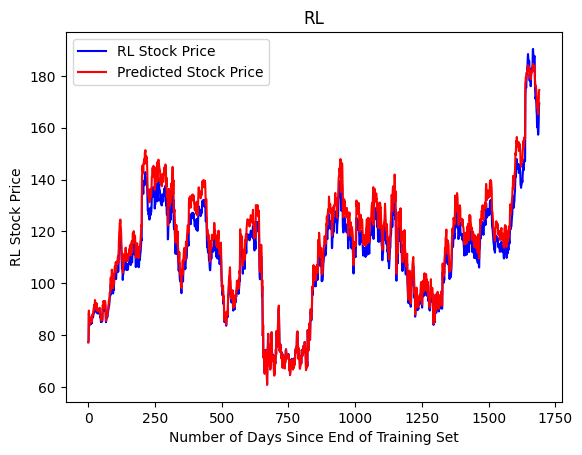

c:\Users\nithi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


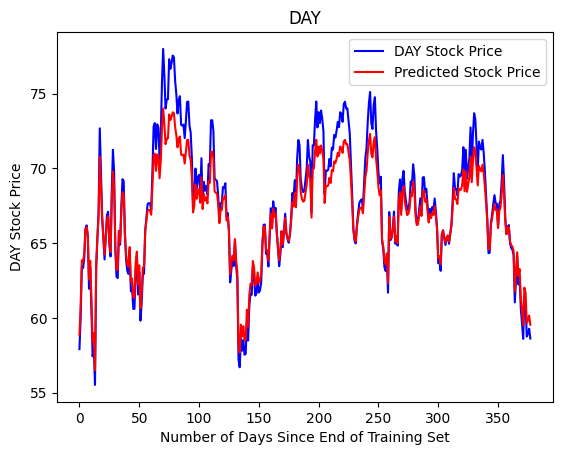

c:\Users\nithi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


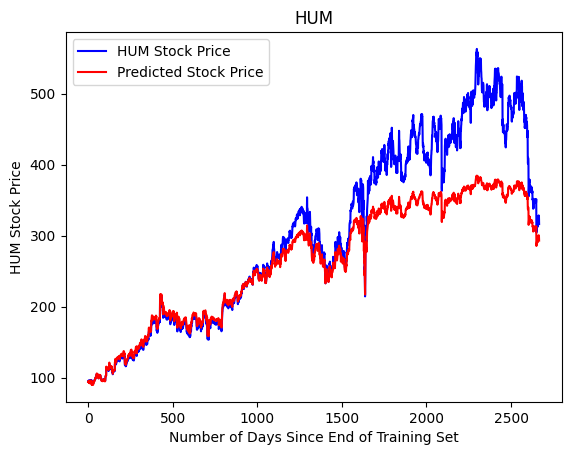

c:\Users\nithi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


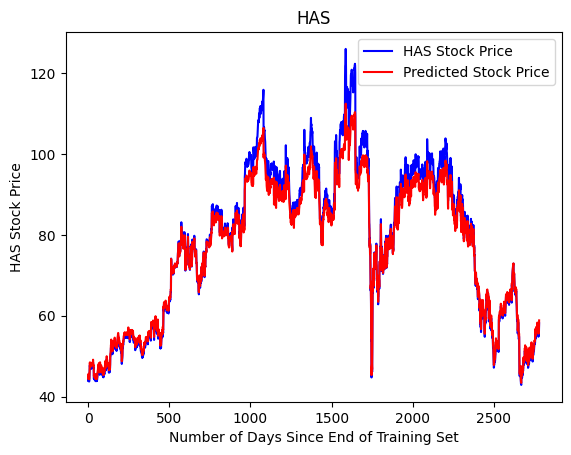

c:\Users\nithi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
Models = []
for ticker in StockTickers:
    tickerdict = {"Ticker":  ticker}
    model = TickerModel(DaytoDayData, ticker)
    tickerdict["Model"] = model
    Models.append(tickerdict)
    if ticker in graphing_selected.values:
        plot(model[0], model[1], ticker)

#### **8. Statistical Inference and Information Presentation**
Now onto the results. We have two different characteristics we aim to be successful in. One is identifying the price movement, the other the price magnitude. 
We would also like to understand how well our model fits the training and test stock data, and the rate of error.
##### *Price Movement Direction*
First, the price movement direction. We simply created a function that determined whether or not the direction of the predicted price was the same as the actual price for a given day. 
We then summed the number of instances and divided it by the number of predicted values to give us the price movement accuracy percentage. 
##### *Price Movement Magnitude*
Secondly, we have the difference in magnitude between the predicted prices and the actual prices in the testing set. We provided both a graph and a summary for this. 
The graph consists of the direct percentage difference between the actual value and predicted price. The summary is in the form of MSE, to completely emphasize larger errors since they are more important.
We also tried testing the overall 3 day and week long error of the model if it used its own predictions to forecast future data. These graphs can be shown here.

Percentage of days with correct predicted direction of stock price 7 days ahead for FITB is:
99.96402877697842%


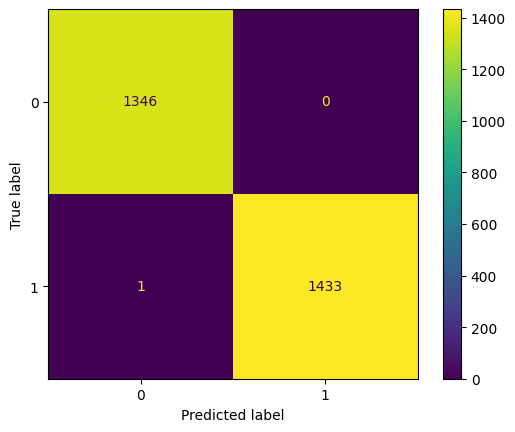

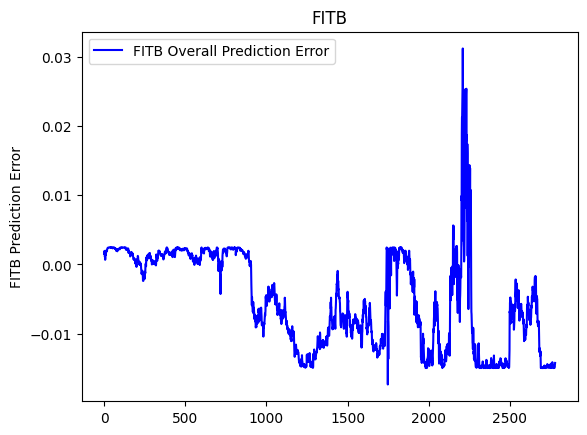

Percentage of days with correct predicted direction of stock price 7 days ahead for FTV is:
100.0%


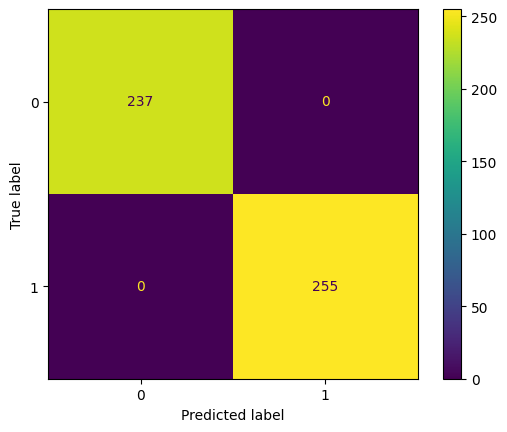

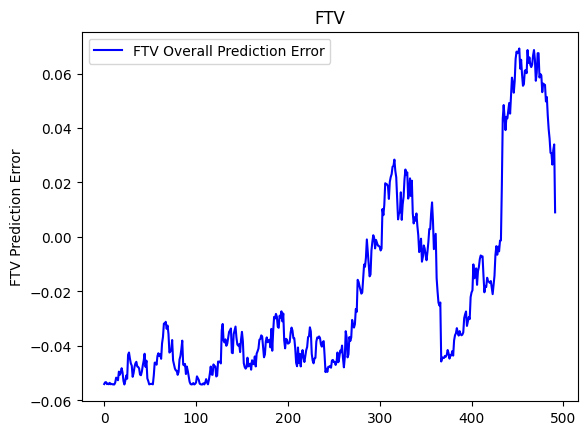

Percentage of days with correct predicted direction of stock price 7 days ahead for AON is:
99.96385977593062%


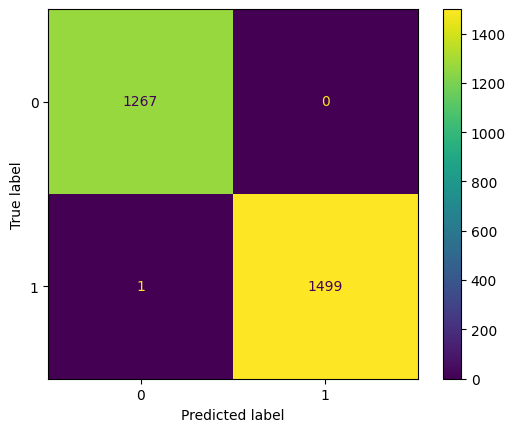

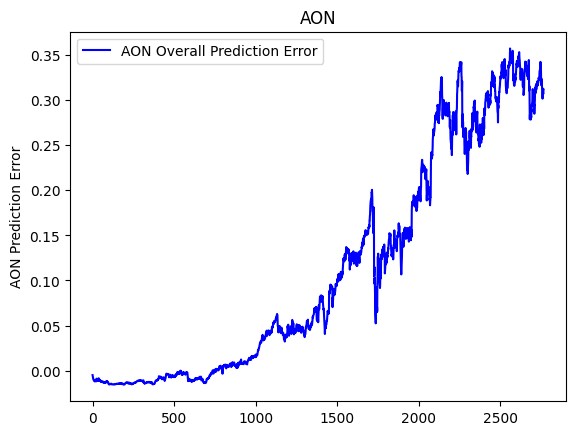

Percentage of days with correct predicted direction of stock price 7 days ahead for HAL is:
97.6161369193154%


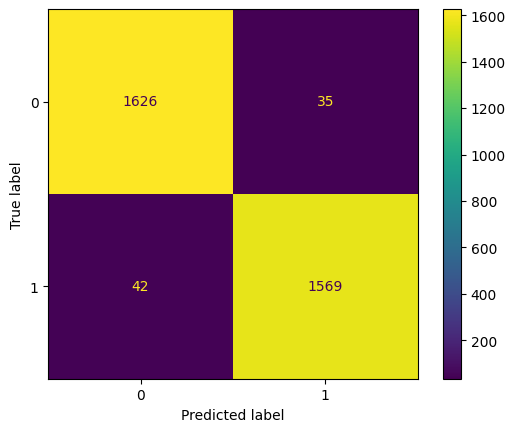

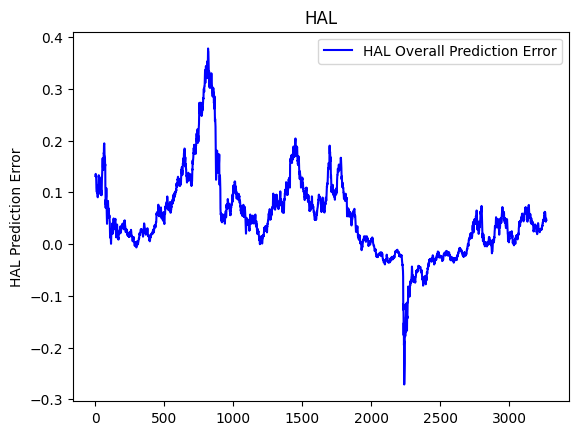

Percentage of days with correct predicted direction of stock price 7 days ahead for SYF is:
100.0%


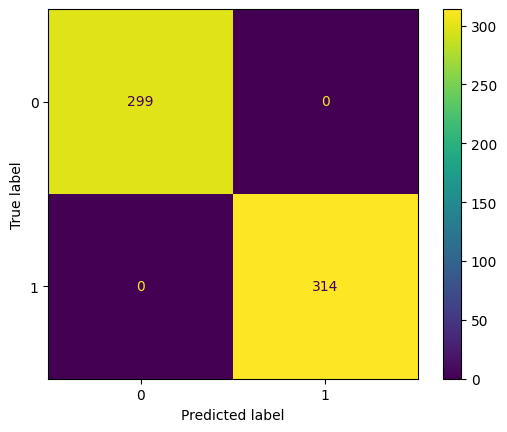

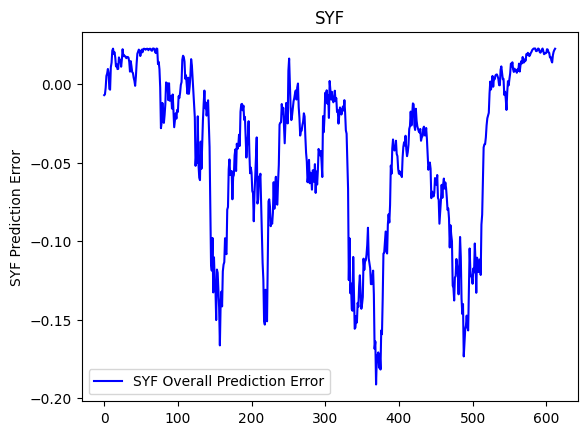

In [ ]:
for model in Models:
    if model["Ticker"] in graphing_selected.values:
        updownmagnitudeerrors(model["Model"][0],model["Model"][1],model["Model"][2])

##### *Explained Variance and Error*
Third, we wanted to look at the accuracy of our models as a stock modelling function, which is best shown by the R^2(or Explained Variance) of our models for the test sets
##### *Volatility and Explained Variance*
Fourth, we wanted to explore the correlation between the volatility of the stock computed before(the up-down ratio) and the R^2 value. Using our sample size of 30 stocks and their predictions, we determined that the higher the volatilty the less effective the model. 
As can be seen by the graph here.

Mean Average Percentage Errors for FITB is:
0.6777433788601864%
Root of Mean Square Errors for FITB is:
0.2893193906193279
R^2 Value For FITB in the test set is:
0.9985388047843552
Mean Average Percentage Errors for FTV is:
3.6506310210150015%
Root of Mean Square Errors for FTV is:
2.7734810285986855
R^2 Value For FTV in the test set is:
0.8728755245697184
Mean Average Percentage Errors for AON is:
11.848923082274602%
Root of Mean Square Errors for AON is:
48.93464640801379
R^2 Value For AON in the test set is:
0.6656683644085544
Mean Average Percentage Errors for HAL is:
6.783736532329672%
Root of Mean Square Errors for HAL is:
5.236103505096313
R^2 Value For HAL in the test set is:
0.8248064942121212
Mean Average Percentage Errors for SYF is:
4.980057231490694%
Root of Mean Square Errors for SYF is:
2.034455459820942
R^2 Value For SYF in the test set is:
0.8538817846985867


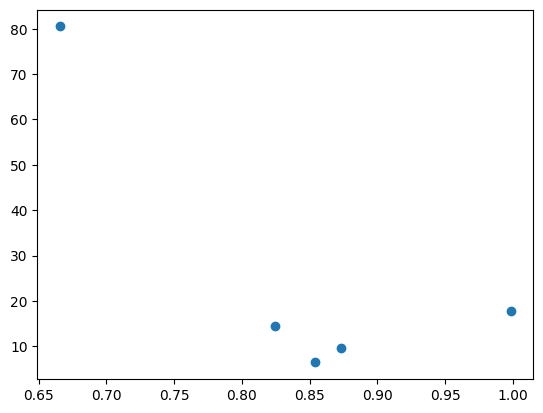

In [ ]:
rsquaredformodels = []
stddevformodels = []
for model in Models:
    predict = model["Model"][0]
    value = model["Model"][1]
    ticker = model["Model"][2]
    if model["Ticker"] in graphing_selected.values:
        valueerrors(predict, value, ticker)
    rsquaredformodels.append(r2_score(value[len(value)-len(predict):], predict))
    res = np.std(value) #calculating volatility
    stddevformodels.append(res)
x = plt.scatter(rsquaredformodels, stddevformodels)
